<a href="https://colab.research.google.com/github/Ruthnguli/-Supervised-Learning-with-Exploratory-Data-Analysis/blob/main/Copy_of_Ruth_Nguli_DS_ML_Week1_IP_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning with Exploratory Data Analysis 

## 1. Defining the Question

### a) Specifying the Question


> To Predict result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).



### b) Defining the Metric for Success

1. Polynomial regression 
2. logistic regression
3. computing RMSE

### c) Understanding the context 

FIFA World Ranking is a ranking system for men's national teams in association football.The teams of the men's member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest. The rankings were introduced in December 1992 and a points system is used, with points being awarded based on the results of all FIFA-recognised full international matches.

### d) Recording the Experimental Design

Loading the datasets and reading them with pandas libraries. Cleaning and performing exploratory data analysis and finally coming up wth models that can predict the games.

## 2. Reading the Data

In [5]:
# Loading the Datasets

# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load first dataset

fifa = pd.read_csv("/content/fifa_ranking.csv")

# Load second dataset 
results = pd.read_csv("/content/results.csv")


## 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset
#
# fifa ranking data
print(fifa.shape)

# results data

print(results.shape)

(57793, 16)
(40839, 9)


There are 57,793 entries and 16 columns i the fifa ranking dataset and 40,839 row and 9 columns in results data.

In [4]:
# Previewing the top of our dataset
#first dataset

fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [5]:
# Previewing the top of our dataset
#second data dataset

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [6]:
# Previewing the bottom of our dataset
# firts dataset
fifa.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [7]:
# Previewing the bottom of our dataset
# second dataset
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [8]:
# Checking whether each column has an appropriate datatype
# first dataset
print("Fifa ranking data")
print(fifa.dtypes)

#second data
print(" ")
print("Results data")
print(results.dtypes)


Fifa ranking data
rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object
 
Results data
date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object


The first data consists of 4 columns of type object, 9 float type and 3 interger type. While the second data consists of 6 object type, 2 interger and 1 boolean. The date column in both datasets is not of the datetime type.

## 5. Tidying the Dataset

In [6]:
# Aligning data and removing space

fifa.columns =fifa.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(','').str.replace(')','')
fifa.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [7]:
# checking the numerical columns 
fifa.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


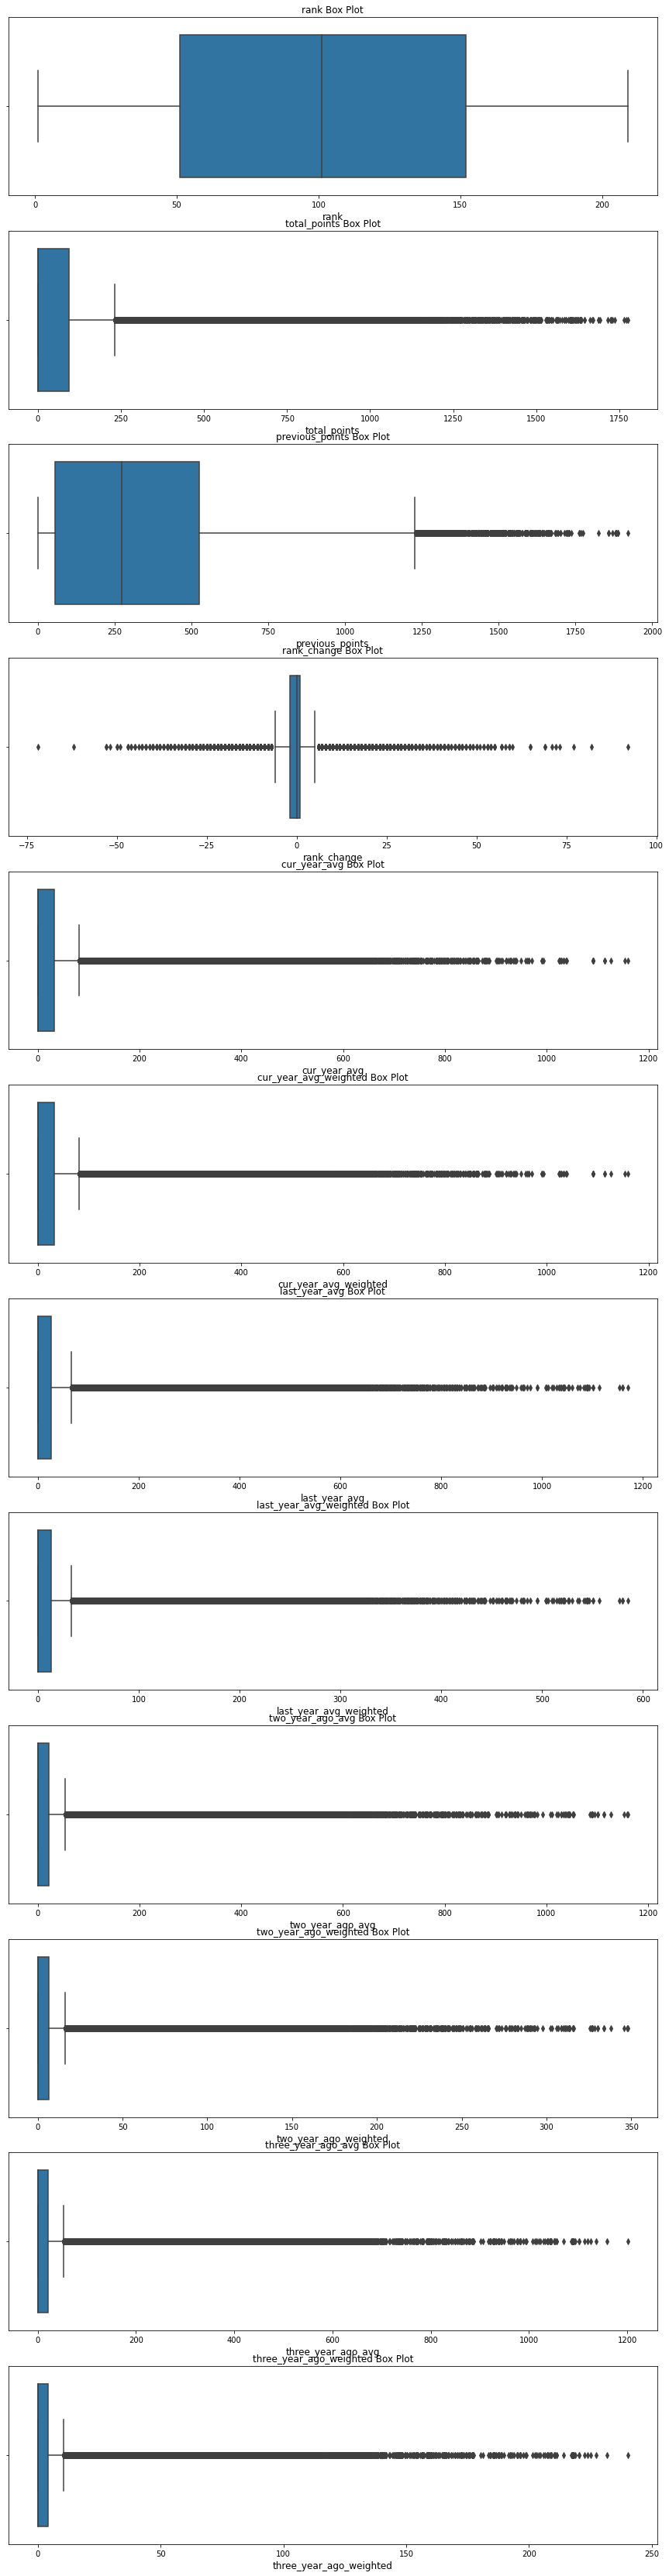

In [11]:
# Checking for Outliers and anomalies
#
col_names = ['rank',	'total_points',	'previous_points',	'rank_change',	'cur_year_avg',	'cur_year_avg_weighted', 'last_year_avg',	
                     'last_year_avg_weighted', 'two_year_ago_avg',	'two_year_ago_weighted',	'three_year_ago_avg',	'three_year_ago_weighted']

fig, ax = plt.subplots(len(col_names), figsize = (15,60))


for i, col_val in enumerate(col_names):

    sns.boxplot(x=fifa[col_val], ax=ax[i])
    ax[i].set_title('{} Box Plot'.format(col_val))
    ax[i].set_xlabel(col_val, fontsize=12)

plt.show()

From the above box plot the numerical columns have outliers however we will not drop them as they represent true vales that will be useful in the analysis process.

In [12]:
# Identifying the Missing Data
#
fifa.isna().sum().sum()

0

There are no missing values in our data.

In [13]:
# Checking duplicate Data
#
fifa.duplicated().sum().sum()

37

There are 37 duplicates.

In [8]:
# dealing with duplicates

fifa.drop_duplicates(keep='first', inplace = True)
fifa.duplicated().any()

False

In [9]:
# Tyding the results dataset

# Aligning data and removing space

results.columns = results.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(','').str.replace(')','')
results.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [16]:
# checking the numerical columns 
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


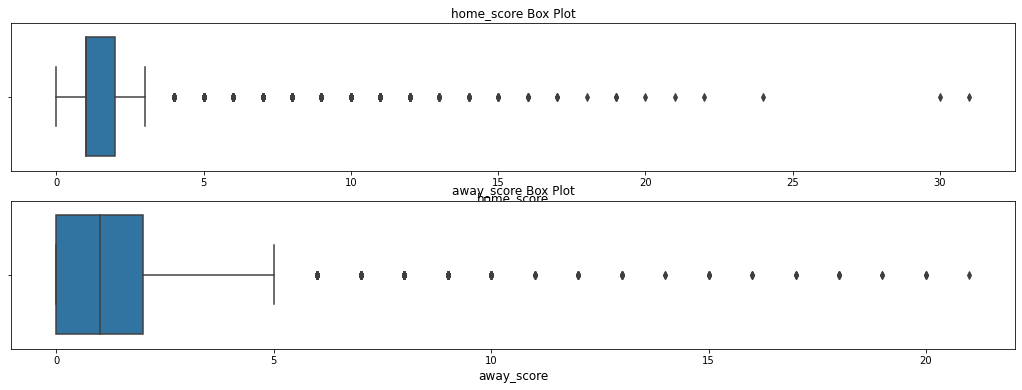

In [17]:
# Checking for Outliers and anomalies
#
col_names = [	'home_score',	'away_score']

fig, ax = plt.subplots(len(col_names), figsize = (18,6))


for i, col_val in enumerate(col_names):

    sns.boxplot(x=results[col_val], ax=ax[i])
    ax[i].set_title('{} Box Plot'.format(col_val))
    ax[i].set_xlabel(col_val, fontsize=12)

plt.show()

From the above box plots the numerical columns have outliers however we will not drop them as they represent true vales that will be useful in the analysis process.

In [18]:
# Identifying the Missing Data
#
results.isna().sum().sum()

0

There are no missing values.

In [19]:
# Checking duplicate Data
#
results.duplicated().sum().sum()

0

Data is not duplicated.

In [20]:
# reviewing column names of the two datasets to find if they have a common column for merging
print("fifa ranking dataset")
print(fifa.columns)

print("**************************************")
print("results dataset")
print(results.columns)

fifa ranking dataset
Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')
**************************************
results dataset
Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')


Date and country column are common in both datasets. 

In [10]:
# renaming column rank_date to date and country_full to country in ranking dataset 

fifa.rename({'rank_date': 'date', 'country_full': 'country'}, inplace=True, axis=1)
fifa.head()

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [11]:
# Merging the two datasets at date column

fifa_results = pd.merge(fifa, results, how = 'left', left_on = ['date','country'], right_on = ['date','country'] )
fifa_results.head()

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# identifying merged dataset columns 
fifa_results.columns

Index(['rank', 'country', 'country_abrv', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral'],
      dtype='object')

In [12]:
# checking if there are any missing 
fifa_results.isna().sum().sum()

398314

The merged dataset has so many missing values that could bias if left. Therefore we drop them.

In [13]:
# Dropping the missing values

fifa_results.dropna(inplace = True)
fifa_results.isna().sum().sum()

0

In [26]:
fifa_results.shape

(950, 23)

In [14]:
fifa_results.head()

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
7,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,Brazil,Mexico,1.0,1.0,Friendly,Maceió,False
34,35,Ecuador,ECU,0.0,23,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,Ecuador,Venezuela,5.0,0.0,FIFA World Cup qualification,Quito,False
49,50,Zimbabwe,ZIM,0.0,27,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,Zimbabwe,Eswatini,2.0,0.0,Friendly,Harare,False
58,59,Bolivia,BOL,0.0,13,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,Bolivia,Uruguay,3.0,1.0,FIFA World Cup qualification,La Paz,False
64,65,Guinea,GUI,0.0,23,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,Guinea,Sierra Leone,1.0,0.0,Friendly,Conakry,False


In [15]:
# Creating a cleaned and merged dataframe

fifa_results.to_csv('fifa_results.csv')

In [16]:
# Loading new dataframe

ranking_results = pd.read_csv("/content/fifa_results.csv")

ranking_results.head()

,Unnamed: 0,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,7,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,Brazil,Mexico,1.0,1.0,Friendly,Maceió,False
1,34,35,Ecuador,ECU,0.0,23,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,Ecuador,Venezuela,5.0,0.0,FIFA World Cup qualification,Quito,False
2,49,50,Zimbabwe,ZIM,0.0,27,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,Zimbabwe,Eswatini,2.0,0.0,Friendly,Harare,False
3,58,59,Bolivia,BOL,0.0,13,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,Bolivia,Uruguay,3.0,1.0,FIFA World Cup qualification,La Paz,False
4,64,65,Guinea,GUI,0.0,23,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,Guinea,Sierra Leone,1.0,0.0,Friendly,Conakry,False


In [17]:

ranking_results.drop(['Unnamed: 0', 'country_abrv'], inplace=True, axis=1)

ranking_results.set_index(['rank'])

,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
rank,,,,,,,,,,,,,,,,,,,,,
8,Brazil,0.00,55,-5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,Brazil,Mexico,1.0,1.0,Friendly,Maceió,False
35,Ecuador,0.00,23,30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,Ecuador,Venezuela,5.0,0.0,FIFA World Cup qualification,Quito,False
50,Zimbabwe,0.00,27,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CAF,1993-08-08,Zimbabwe,Eswatini,2.0,0.0,Friendly,Harare,False
59,Bolivia,0.00,13,28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,Bolivia,Uruguay,3.0,1.0,FIFA World Cup qualification,La Paz,False
65,Guinea,0.00,23,-2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CAF,1993-08-08,Guinea,Sierra Leone,1.0,0.0,Friendly,Conakry,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,England,1050.84,1040,1,476.42,476.42,593.51,296.75,580.49,174.15,517.60,103.52,UEFA,2018-06-07,Kárpátalja,Székely Land,4.0,2.0,CONIFA World Football Cup,Carshalton,True
14,Uruguay,1018.41,976,3,486.28,486.28,487.69,243.84,561.47,168.44,599.26,119.85,CONMEBOL,2018-06-07,Uruguay,Uzbekistan,3.0,0.0,Friendly,Montevideo,False
22,Iceland,908.01,930,0,438.64,438.64,564.25,282.13,302.02,90.61,483.19,96.64,UEFA,2018-06-07,Iceland,Ghana,2.0,2.0,Friendly,Reykjavík,False


## 6. Exploratory Analysis

## a. Univariate

In [31]:
# Ploting the univariate summaries and recording our observations
#
# describing the dataset

ranking_results.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_score,away_score
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,64.905263,52.182116,474.214737,-0.116842,26.510495,26.510495,25.184116,12.592032,26.657200,7.997221,25.412653,5.082516,1.657895,1.042105
std,48.075168,190.135933,318.043068,4.420952,97.787086,97.787086,99.671465,49.835482,100.257323,30.077366,94.555624,18.911083,1.918743,1.234521
min,1.000000,0.000000,0.000000,-22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,233.500000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,0.000000,484.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,96.000000,0.000000,662.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
max,201.000000,1332.160000,1683.000000,30.000000,855.300000,855.300000,1008.940000,504.470000,748.610000,224.580000,640.010000,128.000000,31.000000,12.000000


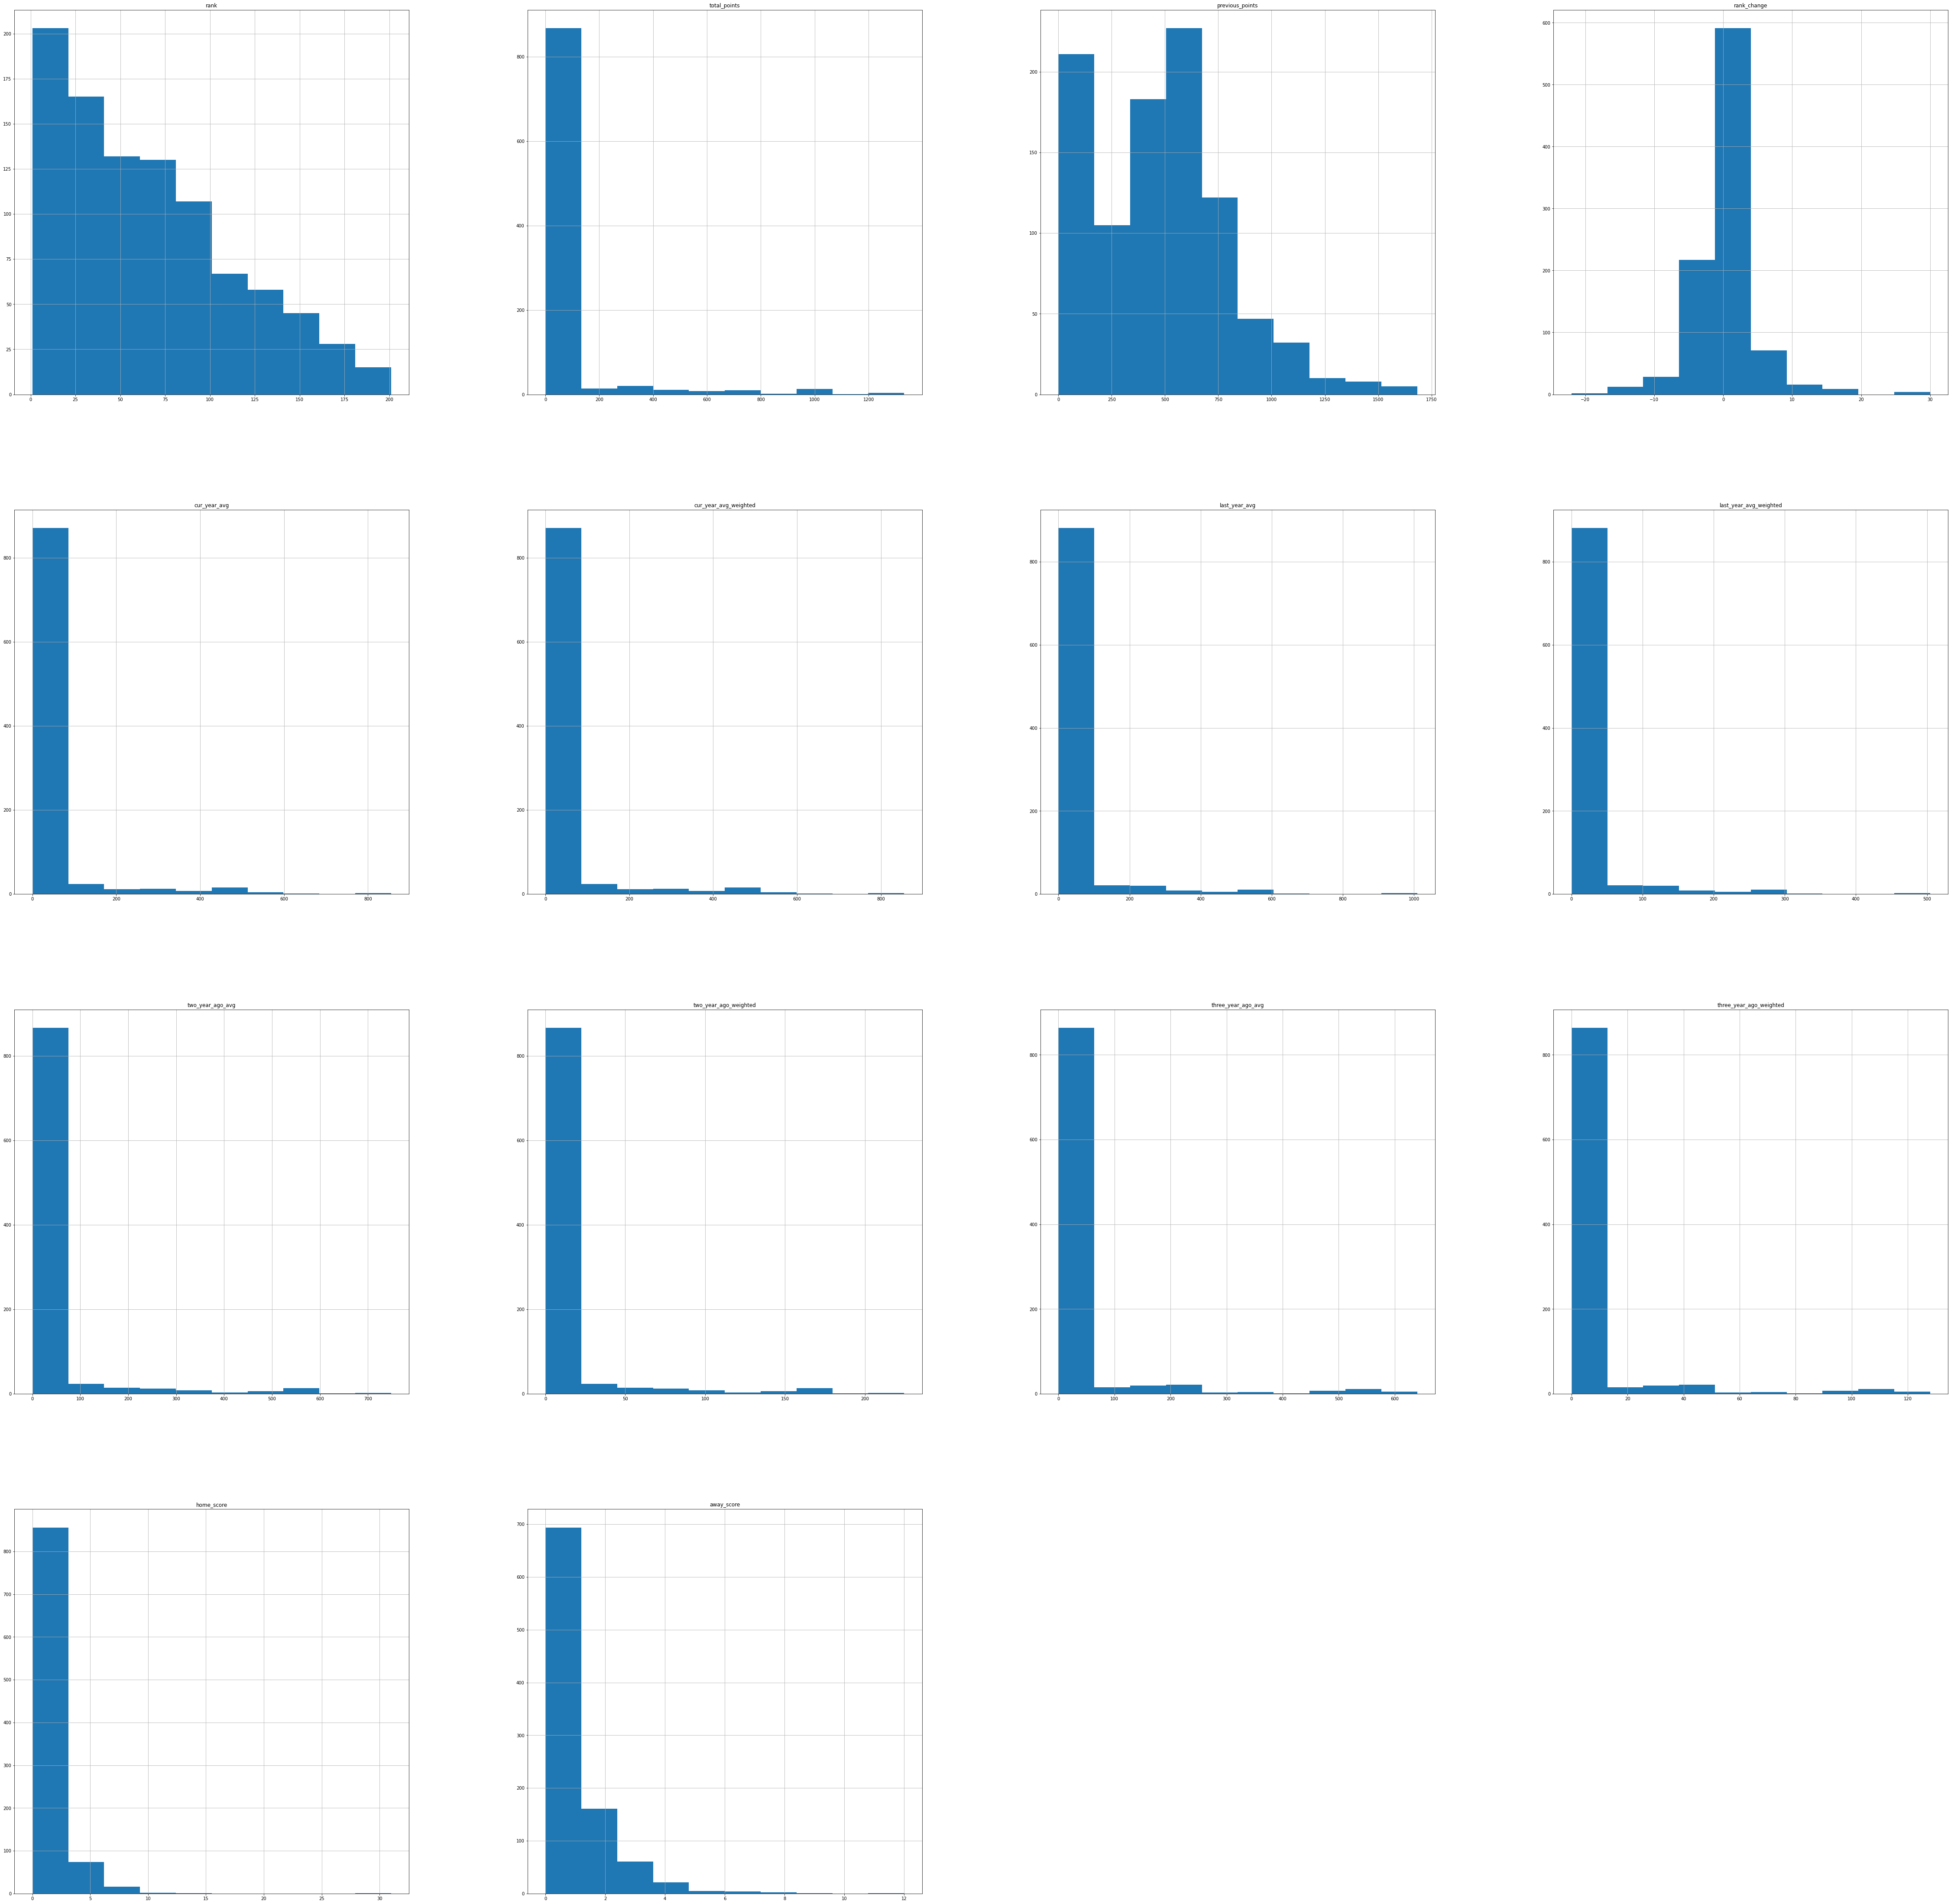

In [32]:
# Plotting Histograms
ranking_results.hist(figsize=(80,80), sharex=False, sharey=False, xlabelsize= 10, ylabelsize=10)
plt.show()

The above histogram shows that most of the data is skewed to the right.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


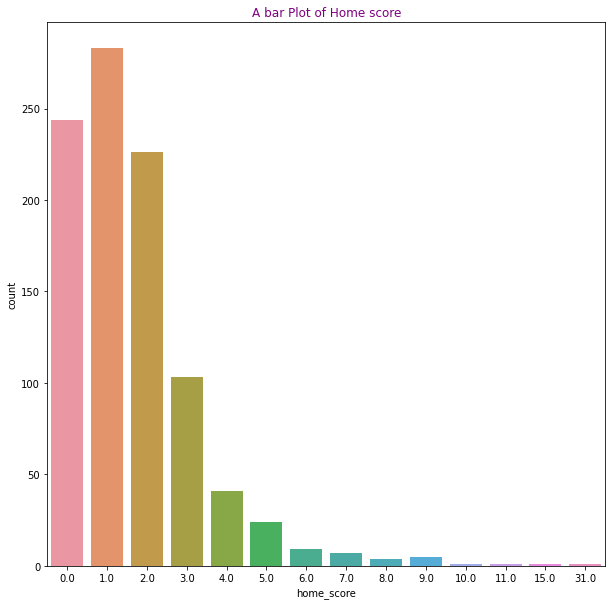

In [33]:
# Plotting a bar plot of home score

plt.figure(figsize=(10, 10))

sns.countplot(ranking_results['home_score'])
plt.title('A bar Plot of Home score', color = 'purple')
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


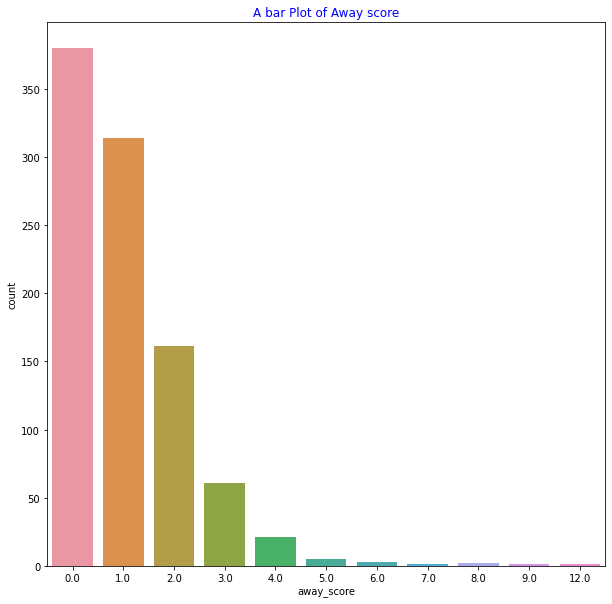

In [34]:
# Plotting a bar plot of away score

plt.figure(figsize=(10, 10))

sns.countplot(ranking_results['away_score'])
plt.title('A bar Plot of Away score', color = 'Blue')
plt.show();

From the above bar graphs, we observe that both home scores and away scores are most  between 0 and 3 scores. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


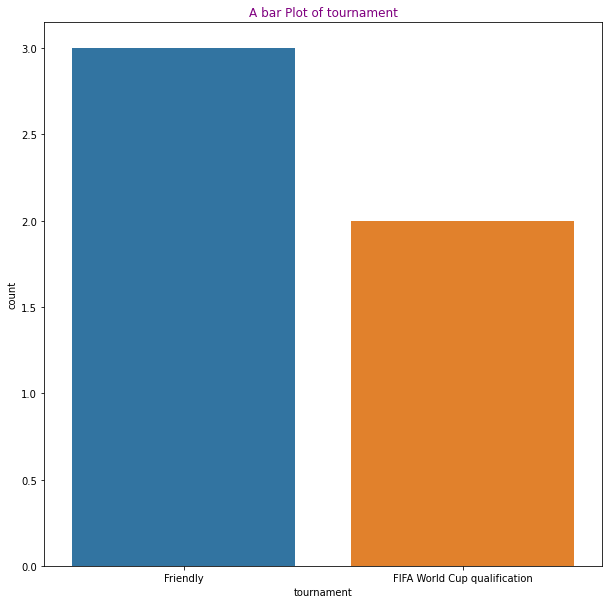

In [35]:
# Plotting a bar plot of tournament

plt.figure(figsize=(10, 10))

sns.countplot(ranking_results['tournament'].head())
plt.title('A bar Plot of tournament', color = 'purple')
plt.show();

Friendly and Fifa world cup qualification tornaments are the most participated in.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


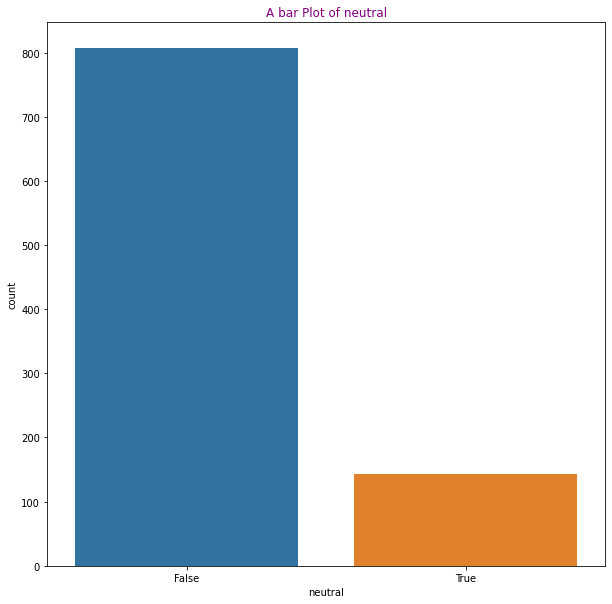

In [36]:
# Plotting a bar plot of neutral

plt.figure(figsize=(10, 10))

sns.countplot(ranking_results['neutral'])
plt.title('A bar Plot of neutral', color = 'purple')
plt.show();

## b. Bivariate

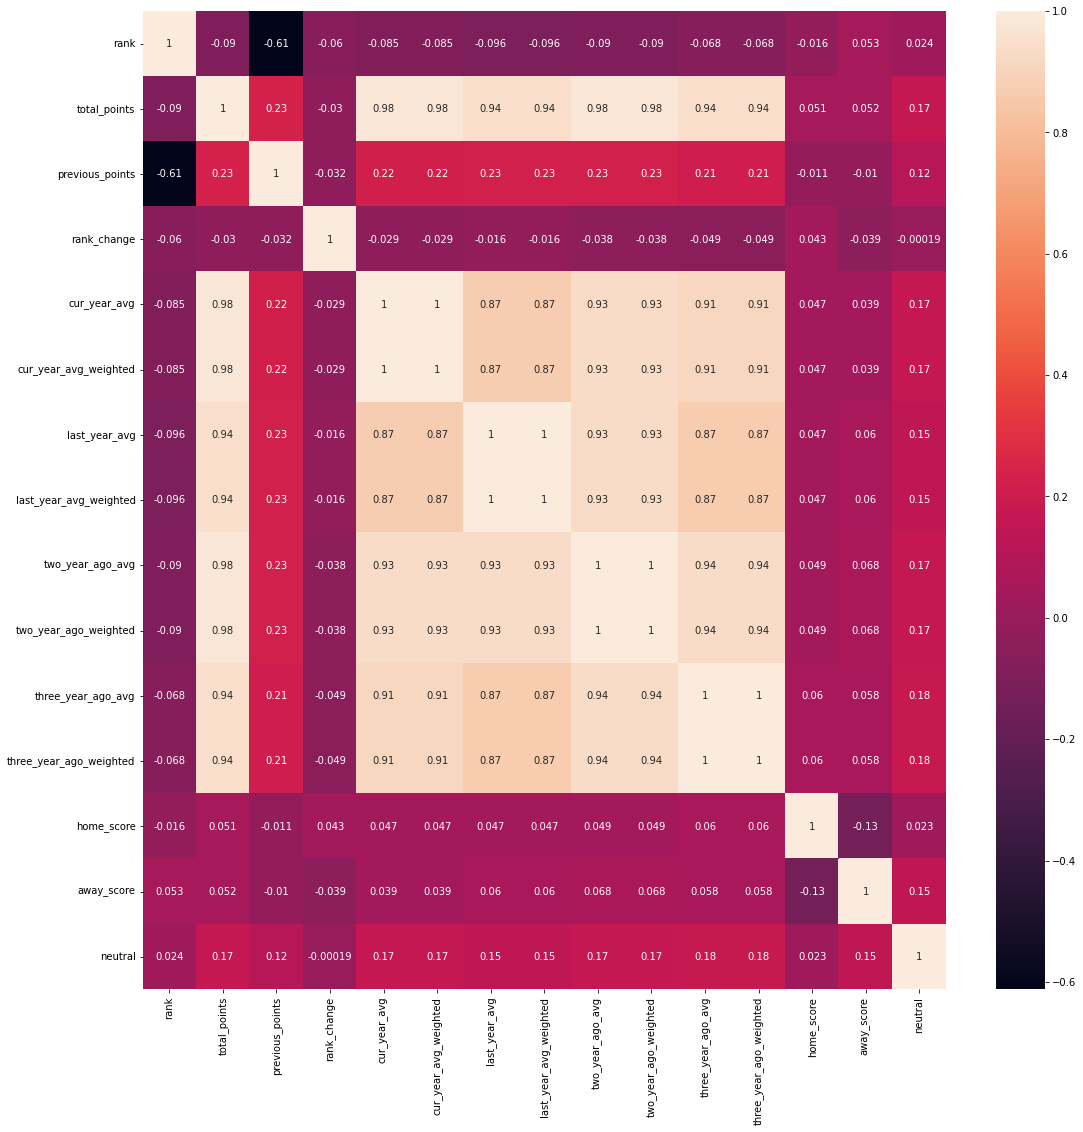

In [37]:
plt.figure(figsize=[18, 18])
sns.heatmap(ranking_results.corr(), annot=True);

Each square shows the correlation between the variables on each axis , Correlation ranges from -1 to +1 values  closer to zero means there is no linear trend between the two variable. The close to 1 the correlation is the more positively correlated they are. current year average is positively (1) related to current year weighted average

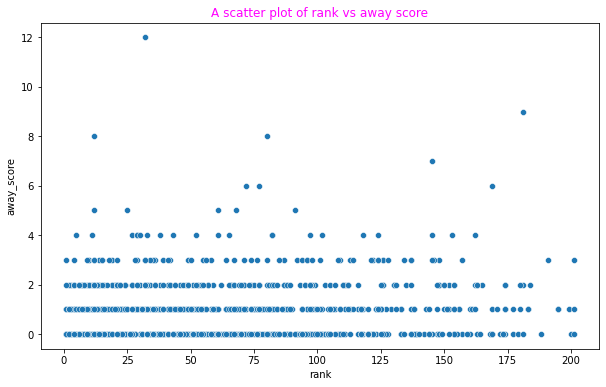

In [38]:
# Plotting a scatter plot of rank vs away_score
plt.figure(figsize=[10, 6])
sns.scatterplot(x = ranking_results["rank"], y = ranking_results["away_score"])
plt.title("A scatter plot of rank vs away score", color = 'magenta');

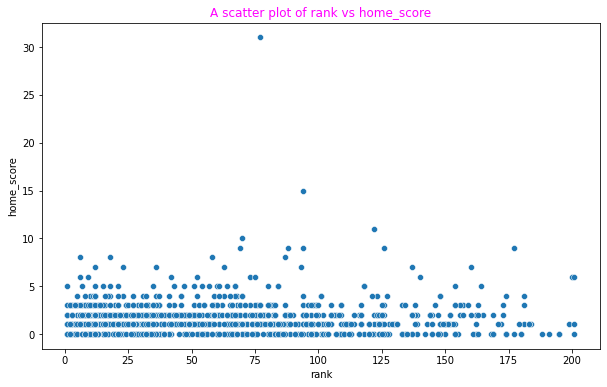

In [39]:
# Plotting a scatter plot of rank vs home_score
plt.figure(figsize=[10, 6])
sns.scatterplot(x = ranking_results["rank"], y = ranking_results["home_score"])
plt.title("A scatter plot of rank vs home_score", color = 'magenta');

## 7. Implementing the Solution

## 1: Polynomial approach

In [18]:
# importing libraries  from sklearn 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn import metrics

# Checking multicollinearity

In [74]:
# Displaying the correlations between the variables to Check of multicollinearity

corrs = ranking_results.drop('home_score', axis = 1).corr()
corrs

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,away_score,neutral
rank,1.000000,-0.089889,-0.612405,-0.060181,-0.084639,-0.084639,-0.096341,-0.096340,-0.090396,-0.090395,-0.068449,-0.068448,0.052657,0.023620
total_points,-0.089889,1.000000,0.231898,-0.030107,0.980736,0.980736,0.943337,0.943336,0.975939,0.975939,0.944821,0.944821,0.052253,0.172129
previous_points,-0.612405,0.231898,1.000000,-0.031568,0.224311,0.224311,0.227159,0.227158,0.229227,0.229227,0.208468,0.208468,-0.010227,0.116232
rank_change,-0.060181,-0.030107,-0.031568,1.000000,-0.029424,-0.029424,-0.015667,-0.015667,-0.037683,-0.037682,-0.049335,-0.049333,-0.038677,-0.000194
cur_year_avg,-0.084639,0.980736,0.224311,-0.029424,1.000000,1.000000,0.869578,0.869578,0.932709,0.932709,0.914654,0.914654,0.038900,0.171133
cur_year_avg_weighted,-0.084639,0.980736,0.224311,-0.029424,1.000000,1.000000,0.869578,0.869578,0.932709,0.932709,0.914654,0.914654,0.038900,0.171133
last_year_avg,-0.096341,0.943337,0.227159,-0.015667,0.869578,0.869578,1.000000,1.000000,0.934813,0.934813,0.865982,0.865982,0.060099,0.147711
last_year_avg_weighted,-0.096340,0.943336,0.227158,-0.015667,0.869578,0.869578,1.000000,1.000000,0.934813,0.934812,0.865982,0.865982,0.060099,0.147710
two_year_ago_avg,-0.090396,0.975939,0.229227,-0.037683,0.932709,0.932709,0.934813,0.934813,1.000000,1.000000,0.935444,0.935444,0.067553,0.173474
two_year_ago_weighted,-0.090395,0.975939,0.229227,-0.037682,0.932709,0.932709,0.934813,0.934812,1.000000,1.000000,0.935445,0.935445,0.067552,0.173474


# Building Model

Model 1: Predict how many goals the home team scores.

In [93]:
# Creating X and y variables
#
X = ranking_results[['rank',	'total_points',	'previous_points',	'rank_change', 'cur_year_avg',	'cur_year_avg_weighted',	'last_year_avg',	'last_year_avg_weighted',
	'two_year_ago_avg',	'two_year_ago_weighted',	'three_year_ago_avg',	'three_year_ago_weighted', 'away_score']]
y = ranking_results['home_score']

# Encoding categorical variables
#
X = pd.get_dummies(X, drop_first=True)

# Splitting the dataset into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Standardising the X_train and the X_test to the same scale
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting the polynomial features to the X_train and X_test
#
poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# Training the model
#
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Making predictions
#
y_pred = regressor.predict(X_test)

# Measuring the accuracy of the model
#
print(np.sqrt(mean_squared_error(y_test, y_pred)))

1.6163444418835133


The RMSE of this model is 1.616 which good enough therefor the model is fit for the prediction of home score.

Model 2: Predict how many goals the away team scores.

In [126]:
 #Creating X and y variables
#
X = ranking_results[['rank',	'total_points',	'previous_points',	'rank_change', 'cur_year_avg',	'cur_year_avg_weighted',	'last_year_avg',	'last_year_avg_weighted',
	'two_year_ago_avg',	'two_year_ago_weighted',	'three_year_ago_avg',	'three_year_ago_weighted', 'home_score']]
y = ranking_results['away_score']

# Encoding categorical variables
#
X = pd.get_dummies(X, drop_first=True)

# Splitting the dataset into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Standardising the X_train and the X_test to the same scale
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting the polynomial features to the X_train and X_test
#
poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# Training the model
#
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Making predictions
#
y_pred = regressor.predict(X_test)

# Measuring the accuracy of the model
#
print(np.sqrt(mean_squared_error(y_test, y_pred)))

1.1576753351738993


The RMSE of this model is 1.1576 which is good enough therefore the model is fit for the prediction of away scores.

# Cross validation


Model 1: Predict how many goals the home team scores.

In [48]:
# Creating X and y variables
#
X = ranking_results[['rank',	'total_points',	'previous_points',	'rank_change', 'cur_year_avg',	'cur_year_avg_weighted',	'last_year_avg',	'last_year_avg_weighted',
	'two_year_ago_avg',	'two_year_ago_weighted',	'three_year_ago_avg',	'three_year_ago_weighted', 'away_score']].values
y = ranking_results['home_score'].values

from sklearn.model_selection import LeaveOneOut
folds = LeaveOneOut()

#defining the KFolds
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

RMSES = [] 
count = 0  
for train_index, test_index in folds.split(X):
  
 
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 950 folds
trained 950 models


1.2260448069341767

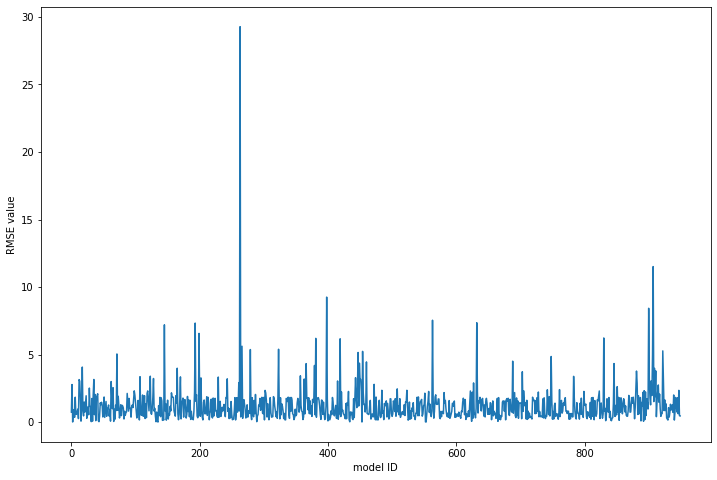

In [49]:
# ploting the  RMSE 

plt.figure(figsize=(12,8))
plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.xlabel('model ID')
plt.show()

Model 2: Predict how many goals the away team scores

In [50]:
# Creating X and y variables
#
X = ranking_results[['rank',	'total_points',	'previous_points',	'rank_change', 'cur_year_avg',	'cur_year_avg_weighted',	'last_year_avg',	'last_year_avg_weighted',
	'two_year_ago_avg',	'two_year_ago_weighted',	'three_year_ago_avg',	'three_year_ago_weighted', 'home_score']].values
y = ranking_results['away_score'].values

from sklearn.model_selection import LeaveOneOut
folds = LeaveOneOut()

#defining the KFolds
print('we are using ' + str(folds.get_n_splits(X)) + ' folds')

RMSES = [] 
count = 0  
for train_index, test_index in folds.split(X):
  
 
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 950 folds
trained 950 models


0.8840205922818513

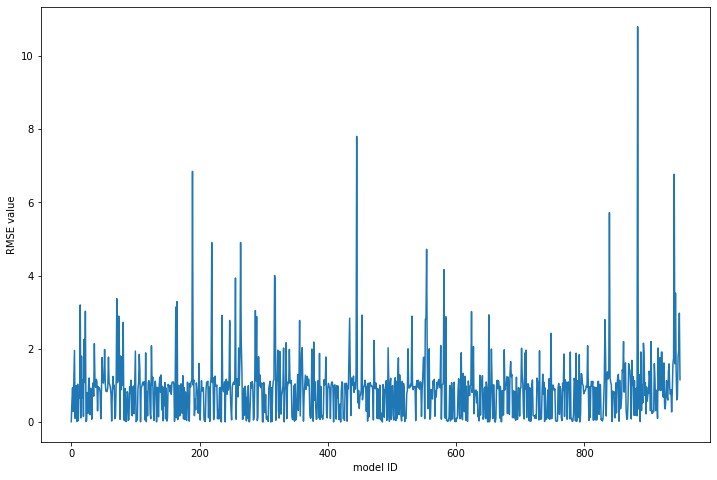

In [51]:
# ploting the  RMSE 

plt.figure(figsize=(12,8))
plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.xlabel('model ID')
plt.show()

# Residual plots and heteroscedasticity using Bartlett’s test

Model 1: Predict how many goals the home team scores.

In [103]:
# Creating X and y variables
# 
X = ranking_results[['rank',	'total_points',	'previous_points',	'rank_change', 'cur_year_avg',	'cur_year_avg_weighted',	'last_year_avg',	'last_year_avg_weighted',
	'two_year_ago_avg',	'two_year_ago_weighted',	'three_year_ago_avg',	'three_year_ago_weighted', 'away_score']].values
y = ranking_results['home_score'].values


# Splitting the dataset into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Model prection
y_predict = regressor.predict(X_test)


# value for each row in our dataset

residuals = np.subtract(y_predict, y_test)

# Describing 
pd.DataFrame(residuals).describe()

residuals.mean()

0.019065217157775243

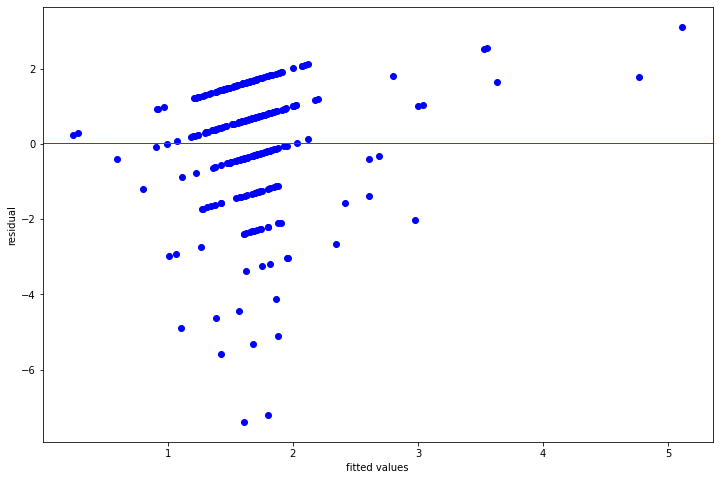

In [108]:
# residual plot

plt.figure(figsize=(12,8))
plt.scatter(y_predict, residuals, color='blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [112]:
# heterostekadacity

import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# computing a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)


if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


the variances are homogeneous!


Model 2: Predict how many goals the away team scores.

In [52]:
# Creating X and y variables
# 
X = ranking_results[['rank',	'total_points',	'previous_points',	'rank_change', 'cur_year_avg',	'cur_year_avg_weighted',	'last_year_avg',	'last_year_avg_weighted',
	'two_year_ago_avg',	'two_year_ago_weighted',	'three_year_ago_avg',	'three_year_ago_weighted', 'home_score']].values
y = ranking_results['away_score'].values


# Splitting the dataset into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Model prection
y_predict = regressor.predict(X_test)


# value for each row in our dataset

residuals = np.subtract(y_predict, y_test)

# Describing 
pd.DataFrame(residuals).describe()

residuals.mean()

-0.017339716101406732

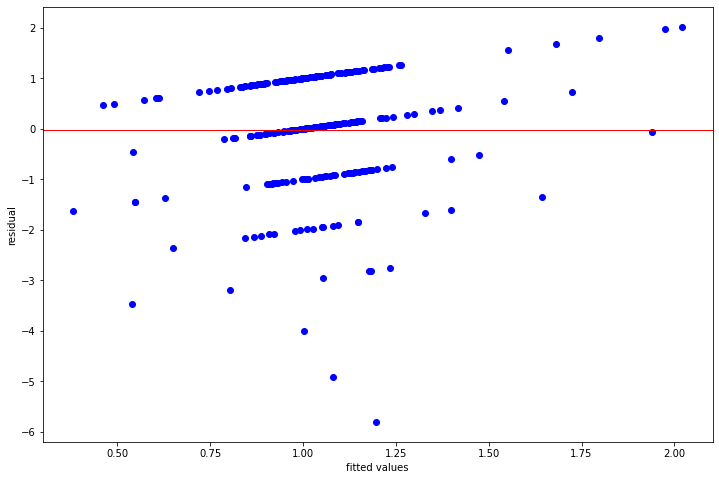

In [53]:
# residual plot

plt.figure(figsize=(12,8))
plt.scatter(y_predict, residuals, color='blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [54]:
# heterostekadacity

import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# computing a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)


if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

the variances are homogeneous!


## Approach 2: Logistic approach

In [19]:
# Creating a new column for performance (target variable) by subtracting the away score from the home score
# 0 goals reps  draw
# gaols > 1 rep Win
# goals < 1 rep loss
#
ranking_results['score'] = ranking_results.home_score - ranking_results.away_score
ranking_results.score.head()

0    0.0
1    5.0
2    2.0
3    2.0
4    1.0
Name: score, dtype: float64

In [20]:
# function to create the new performance column
def result(goals):
  if goals > 0:
    return 'Win'
  elif goals < 0:
    return 'Lose'
  else:
    return 'Draw'
# Applying the function 

ranking_results['performance'] = ranking_results.score.apply(lambda x: result(x))

ranking_results.drop('score', axis = 1, inplace = True)

ranking_results.head()

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral,performance
0,8,Brazil,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,Brazil,Mexico,1.0,1.0,Friendly,Maceió,False,Draw
1,35,Ecuador,0.0,23,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,Ecuador,Venezuela,5.0,0.0,FIFA World Cup qualification,Quito,False,Win
2,50,Zimbabwe,0.0,27,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,Zimbabwe,Eswatini,2.0,0.0,Friendly,Harare,False,Win
3,59,Bolivia,0.0,13,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,Bolivia,Uruguay,3.0,1.0,FIFA World Cup qualification,La Paz,False,Win
4,65,Guinea,0.0,23,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,Guinea,Sierra Leone,1.0,0.0,Friendly,Conakry,False,Win


In [35]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

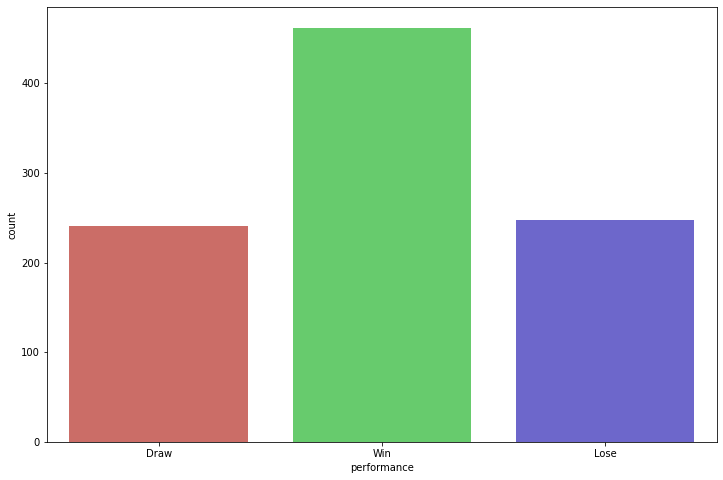

In [22]:
# Checking that our target variable is well distributed

plt.figure(figsize=(12,8))
sns.countplot(x='performance',data=ranking_results, palette='hls')
plt.show();

In [32]:
# Creating X and y variables
X = ranking_results.drop(['performance'], axis=1)
y = ranking_results['performance']

# Encoding the categorical features

X = pd.get_dummies(X, drop_first=True)


In [ ]:
# splitting the datase

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

# fitting the model

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

In [36]:
# using the model 
y_pred = LogReg.predict(X_test)



In [37]:
# Evaluating the model

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

# Measuring the accuracy 

print(f'The accuracy of the model is {accuracy_score(y_test, y_pred)}')


[[ 33   8  23]
 [ 14  60   4]
 [ 10   0 133]]
The accuracy of the model is 0.7929824561403509


The results show that we have 33,8 and 133 corrcet numbers of prediction. 

## 7. Challenging the solution



There is 79 % accuracy. This could be improved by trying other appraoches to come with the best accurate model.